# 기본

In [5]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = 'https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=default&so=WAR&ob=DESC&year=2022&sy=&ey=&te=&po=&lt=10100&reg=&pe=&ds=&de=&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2='

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

team_table = soup.find_all('table')[1]  # 팀 테이블

team_df_pitching_22 = pd.read_html(str(team_table))[0]  # 팀 데이터프레임

print("페이지의 팀 기록 데이터프레임:\n")

team_df_pitching_22

페이지의 팀 기록 데이터프레임:



,Rank,Team,Unnamed: 2_level_0,정렬▼,G,GS,GR,GF,W,L,S,HD,IP,ER,R,rRA,TBF,H,2B,3B,HR,BB,HP,IB,SO,ROE,BK,WP,ERA,RA9,rRA9,FIP,WHIP,WAR▼
,Rank,Team,Unnamed: 2_level_1,WAR,G,GS,GR,GF,W,L,S,HD,IP,ER,R,rRA,TBF,H,2B,3B,HR,BB,HP,IB,SO,ROE,BK,WP,ERA,RA9,rRA9,FIP,WHIP,WAR▼
0,1,KT,22,28.19,588,144,444,144,80,62,37,65,1287.1,509,562,562.0,5405,1243,188,19,92,364,63,22,1074,56,3,43,3.56,3.93,3.93,3.52,1.25,28.19
1,2,LG,22,25.11,748,144,604,144,87,55,43,107,1288.0,476,521,521.0,5432,1179,166,34,94,451,59,27,1031,60,0,49,3.33,3.64,3.64,3.82,1.27,25.11
2,3,키움,22,24.81,649,144,505,144,80,62,48,84,1296.1,548,610,610.0,5579,1247,259,15,96,490,70,18,1010,77,1,51,3.80,4.24,4.24,4.03,1.34,24.81
3,4,롯데,22,24.50,675,144,531,144,64,76,34,69,1280.2,637,712,712.0,5686,1373,257,22,84,492,80,21,1199,69,1,72,4.48,5.00,5.00,3.52,1.46,24.50
4,5,삼성,22,23.47,686,144,542,144,66,76,34,71,1287.0,620,695,695.0,5678,1370,251,15,129,478,66,22,971,82,3,47,4.34,4.86,4.86,4.33,1.44,23.47
5,6,NC,22,22.95,681,144,537,144,67,74,25,54,1286.2,559,642,642.0,5604,1230,218,18,111,515,98,10,1168,75,5,80,3.91,4.49,4.49,3.96,1.36,22.95
6,7,SSG,22,21.11,598,144,454,144,88,52,45,68,1301.1,564,622,622.0,5533,1223,174,17,130,457,65,18,1023,79,2,75,3.90,4.30,4.30,4.25,1.29,21.11
7,8,KIA,22,17.58,675,144,531,144,70,73,38,74,1279.2,599,679,679.0,5636,1286,233,22,120,526,67,20,1042,77,2,56,4.21,4.78,4.78,4.21,1.42,17.58
8,9,두산,22,13.16,670,144,526,144,60,82,32,68,1279.1,634,721,721.0,5700,1336,206,19,117,555,70,11,977,79,5,69,4.46,5.07,5.07,4.40,1.48,13.16


In [6]:
# 첫 번째 행을 헤더로 지정하고 데이터프레임을 새로 생성
team_2022_pitching = team_df_pitching_22.copy()
team_2022_pitching.columns = team_2022_pitching.columns.get_level_values(1)

# 첫 번째 행 제거
new_df = team_2022_pitching.drop([0])

team_2022_pitching

,Rank,Team,Unnamed: 2_level_1,WAR,G,GS,GR,GF,W,L,S,HD,IP,ER,R,rRA,TBF,H,2B,3B,HR,BB,HP,IB,SO,ROE,BK,WP,ERA,RA9,rRA9,FIP,WHIP,WAR▼
0,1,KT,22,28.19,588,144,444,144,80,62,37,65,1287.1,509,562,562.0,5405,1243,188,19,92,364,63,22,1074,56,3,43,3.56,3.93,3.93,3.52,1.25,28.19
1,2,LG,22,25.11,748,144,604,144,87,55,43,107,1288.0,476,521,521.0,5432,1179,166,34,94,451,59,27,1031,60,0,49,3.33,3.64,3.64,3.82,1.27,25.11
2,3,키움,22,24.81,649,144,505,144,80,62,48,84,1296.1,548,610,610.0,5579,1247,259,15,96,490,70,18,1010,77,1,51,3.80,4.24,4.24,4.03,1.34,24.81
3,4,롯데,22,24.50,675,144,531,144,64,76,34,69,1280.2,637,712,712.0,5686,1373,257,22,84,492,80,21,1199,69,1,72,4.48,5.00,5.00,3.52,1.46,24.50
4,5,삼성,22,23.47,686,144,542,144,66,76,34,71,1287.0,620,695,695.0,5678,1370,251,15,129,478,66,22,971,82,3,47,4.34,4.86,4.86,4.33,1.44,23.47
5,6,NC,22,22.95,681,144,537,144,67,74,25,54,1286.2,559,642,642.0,5604,1230,218,18,111,515,98,10,1168,75,5,80,3.91,4.49,4.49,3.96,1.36,22.95
6,7,SSG,22,21.11,598,144,454,144,88,52,45,68,1301.1,564,622,622.0,5533,1223,174,17,130,457,65,18,1023,79,2,75,3.90,4.30,4.30,4.25,1.29,21.11
7,8,KIA,22,17.58,675,144,531,144,70,73,38,74,1279.2,599,679,679.0,5636,1286,233,22,120,526,67,20,1042,77,2,56,4.21,4.78,4.78,4.21,1.42,17.58
8,9,두산,22,13.16,670,144,526,144,60,82,32,68,1279.1,634,721,721.0,5700,1336,206,19,117,555,70,11,977,79,5,69,4.46,5.07,5.07,4.40,1.48,13.16
9,10,한화,22,8.75,749,144,605,144,46,96,25,81,1268.1,680,759,759.0,5710,1314,268,22,112,602,83,39,974,86,4,65,4.83,5.39,5.39,4.42,1.51,8.75


In [7]:
team_2022_pitching.drop(columns=['WAR▼'], inplace=True)
team_2022_pitching

,Rank,Team,Unnamed: 2_level_1,WAR,G,GS,GR,GF,W,L,S,HD,IP,ER,R,rRA,TBF,H,2B,3B,HR,BB,HP,IB,SO,ROE,BK,WP,ERA,RA9,rRA9,FIP,WHIP
0,1,KT,22,28.19,588,144,444,144,80,62,37,65,1287.1,509,562,562.0,5405,1243,188,19,92,364,63,22,1074,56,3,43,3.56,3.93,3.93,3.52,1.25
1,2,LG,22,25.11,748,144,604,144,87,55,43,107,1288.0,476,521,521.0,5432,1179,166,34,94,451,59,27,1031,60,0,49,3.33,3.64,3.64,3.82,1.27
2,3,키움,22,24.81,649,144,505,144,80,62,48,84,1296.1,548,610,610.0,5579,1247,259,15,96,490,70,18,1010,77,1,51,3.80,4.24,4.24,4.03,1.34
3,4,롯데,22,24.50,675,144,531,144,64,76,34,69,1280.2,637,712,712.0,5686,1373,257,22,84,492,80,21,1199,69,1,72,4.48,5.00,5.00,3.52,1.46
4,5,삼성,22,23.47,686,144,542,144,66,76,34,71,1287.0,620,695,695.0,5678,1370,251,15,129,478,66,22,971,82,3,47,4.34,4.86,4.86,4.33,1.44
5,6,NC,22,22.95,681,144,537,144,67,74,25,54,1286.2,559,642,642.0,5604,1230,218,18,111,515,98,10,1168,75,5,80,3.91,4.49,4.49,3.96,1.36
6,7,SSG,22,21.11,598,144,454,144,88,52,45,68,1301.1,564,622,622.0,5533,1223,174,17,130,457,65,18,1023,79,2,75,3.90,4.30,4.30,4.25,1.29
7,8,KIA,22,17.58,675,144,531,144,70,73,38,74,1279.2,599,679,679.0,5636,1286,233,22,120,526,67,20,1042,77,2,56,4.21,4.78,4.78,4.21,1.42
8,9,두산,22,13.16,670,144,526,144,60,82,32,68,1279.1,634,721,721.0,5700,1336,206,19,117,555,70,11,977,79,5,69,4.46,5.07,5.07,4.40,1.48
9,10,한화,22,8.75,749,144,605,144,46,96,25,81,1268.1,680,759,759.0,5710,1314,268,22,112,602,83,39,974,86,4,65,4.83,5.39,5.39,4.42,1.51


In [8]:
pd.set_option('display.max_columns', None)
team_2022_pitching

,Rank,Team,Unnamed: 2_level_1,WAR,G,GS,GR,GF,W,L,S,HD,IP,ER,R,rRA,TBF,H,2B,3B,HR,BB,HP,IB,SO,ROE,BK,WP,ERA,RA9,rRA9,FIP,WHIP
0,1,KT,22,28.19,588,144,444,144,80,62,37,65,1287.1,509,562,562.0,5405,1243,188,19,92,364,63,22,1074,56,3,43,3.56,3.93,3.93,3.52,1.25
1,2,LG,22,25.11,748,144,604,144,87,55,43,107,1288.0,476,521,521.0,5432,1179,166,34,94,451,59,27,1031,60,0,49,3.33,3.64,3.64,3.82,1.27
2,3,키움,22,24.81,649,144,505,144,80,62,48,84,1296.1,548,610,610.0,5579,1247,259,15,96,490,70,18,1010,77,1,51,3.80,4.24,4.24,4.03,1.34
3,4,롯데,22,24.50,675,144,531,144,64,76,34,69,1280.2,637,712,712.0,5686,1373,257,22,84,492,80,21,1199,69,1,72,4.48,5.00,5.00,3.52,1.46
4,5,삼성,22,23.47,686,144,542,144,66,76,34,71,1287.0,620,695,695.0,5678,1370,251,15,129,478,66,22,971,82,3,47,4.34,4.86,4.86,4.33,1.44
5,6,NC,22,22.95,681,144,537,144,67,74,25,54,1286.2,559,642,642.0,5604,1230,218,18,111,515,98,10,1168,75,5,80,3.91,4.49,4.49,3.96,1.36
6,7,SSG,22,21.11,598,144,454,144,88,52,45,68,1301.1,564,622,622.0,5533,1223,174,17,130,457,65,18,1023,79,2,75,3.90,4.30,4.30,4.25,1.29
7,8,KIA,22,17.58,675,144,531,144,70,73,38,74,1279.2,599,679,679.0,5636,1286,233,22,120,526,67,20,1042,77,2,56,4.21,4.78,4.78,4.21,1.42
8,9,두산,22,13.16,670,144,526,144,60,82,32,68,1279.1,634,721,721.0,5700,1336,206,19,117,555,70,11,977,79,5,69,4.46,5.07,5.07,4.40,1.48
9,10,한화,22,8.75,749,144,605,144,46,96,25,81,1268.1,680,759,759.0,5710,1314,268,22,112,602,83,39,974,86,4,65,4.83,5.39,5.39,4.42,1.51


# 심화

In [9]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = 'https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=deepen&so=FIP&ob=ASC&year=2022&sy=&ey=&te=&po=&lt=10100&reg=&pe=&ds=&de=&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2='

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

team_table = soup.find_all('table')[1]  # 팀 테이블

team_df_pitching_22_2 = pd.read_html(str(team_table))[0]  # 팀 데이터프레임

print("페이지의 팀 기록 데이터프레임:\n")

team_df_pitching_22_2

페이지의 팀 기록 데이터프레임:



,Rank,Team,Unnamed: 2_level_0,정렬▲,G,K/9,BB/9,K/BB,HR/9,K%,BB%,K-BB%,BABIP,LOB,ERA,RA9,rRA9,FIP▲,xFIP,kwERA,ERA-FIP,ERA-,rRA9-,FIP-,AVG,OBP,SLG,OPS,NP,P/G,P/IP,P/PA
,Rank,Team,Unnamed: 2_level_1,FIP,G,K/9,BB/9,K/BB,HR/9,K%,BB%,K-BB%,BABIP,LOB,ERA,RA9,rRA9,FIP▲,xFIP,kwERA,ERA-FIP,ERA-,rRA9-,FIP-,AVG,OBP,SLG,OPS,NP,P/G,P/IP,P/PA
0,1,KT,22,3.52,588,7.51,2.55,2.95,0.64,19.9,6.7,13.1,0.306,71.9,3.56,3.93,3.93,3.52,2.75,3.82,0.04,83.00,78.71,82.59,0.254,0.312,0.357,0.669,20356,34.6,15.8,3.77
1,2,롯데,22,3.52,675,8.43,3.46,2.44,0.59,21.1,8.7,12.4,0.342,67.5,4.48,5.00,5.00,3.52,2.83,3.91,0.96,104.40,100.31,83.04,0.274,0.346,0.384,0.730,21932,32.5,17.1,3.86
2,3,LG,22,3.82,748,7.20,3.15,2.29,0.66,19.0,8.3,10.7,0.290,75.0,3.33,3.64,3.64,3.82,3.04,4.12,-0.49,85.41,88.36,98.62,0.245,0.314,0.352,0.666,20918,28.0,16.2,3.85
3,4,NC,22,3.96,681,8.17,3.60,2.27,0.78,20.8,9.2,11.7,0.306,71.2,3.91,4.49,4.49,3.96,3.03,4.00,-0.05,93.93,95.51,95.90,0.252,0.332,0.372,0.704,22069,32.4,17.2,3.94
4,5,키움,22,4.03,649,7.01,3.40,2.06,0.67,18.1,8.8,9.3,0.299,71.6,3.80,4.24,4.24,4.03,3.23,4.28,-0.23,95.93,98.06,101.63,0.254,0.328,0.371,0.699,21568,33.2,16.6,3.87
5,6,KIA,22,4.21,675,7.33,3.70,1.98,0.84,18.5,9.3,9.2,0.306,70.1,4.21,4.78,4.78,4.21,3.19,4.30,0.00,103.31,105.95,104.46,0.261,0.338,0.391,0.729,21803,32.3,17.0,3.87
6,7,SSG,22,4.25,598,7.08,3.16,2.24,0.90,18.5,8.3,10.2,0.287,71.8,3.90,4.30,4.30,4.25,3.14,4.17,-0.35,92.51,88.18,100.43,0.248,0.318,0.370,0.688,21355,35.7,16.4,3.86
7,8,삼성,22,4.33,686,6.79,3.34,2.03,0.90,17.1,8.4,8.7,0.313,70.3,4.34,4.86,4.86,4.33,3.23,4.36,0.01,101.56,98.29,102.13,0.272,0.341,0.405,0.746,22174,32.3,17.2,3.91
8,9,두산,22,4.40,670,6.87,3.90,1.76,0.82,17.1,9.7,7.4,0.311,69.0,4.46,5.07,5.07,4.40,3.42,4.51,0.06,113.76,121.19,113.78,0.269,0.348,0.389,0.737,22437,33.5,17.5,3.94


In [11]:
# 첫 번째 행을 헤더로 지정하고 데이터프레임을 새로 생성
team_2022_pitching_2 = team_df_pitching_22_2.copy()
team_2022_pitching_2.columns = team_2022_pitching_2.columns.get_level_values(1)

# 첫 번째 행 제거
new_df = team_2022_pitching_2.drop([0])

team_2022_pitching_2

,Rank,Team,Unnamed: 2_level_1,FIP,G,K/9,BB/9,K/BB,HR/9,K%,BB%,K-BB%,BABIP,LOB,ERA,RA9,rRA9,FIP▲,xFIP,kwERA,ERA-FIP,ERA-,rRA9-,FIP-,AVG,OBP,SLG,OPS,NP,P/G,P/IP,P/PA
0,1,KT,22,3.52,588,7.51,2.55,2.95,0.64,19.9,6.7,13.1,0.306,71.9,3.56,3.93,3.93,3.52,2.75,3.82,0.04,83.00,78.71,82.59,0.254,0.312,0.357,0.669,20356,34.6,15.8,3.77
1,2,롯데,22,3.52,675,8.43,3.46,2.44,0.59,21.1,8.7,12.4,0.342,67.5,4.48,5.00,5.00,3.52,2.83,3.91,0.96,104.40,100.31,83.04,0.274,0.346,0.384,0.730,21932,32.5,17.1,3.86
2,3,LG,22,3.82,748,7.20,3.15,2.29,0.66,19.0,8.3,10.7,0.290,75.0,3.33,3.64,3.64,3.82,3.04,4.12,-0.49,85.41,88.36,98.62,0.245,0.314,0.352,0.666,20918,28.0,16.2,3.85
3,4,NC,22,3.96,681,8.17,3.60,2.27,0.78,20.8,9.2,11.7,0.306,71.2,3.91,4.49,4.49,3.96,3.03,4.00,-0.05,93.93,95.51,95.90,0.252,0.332,0.372,0.704,22069,32.4,17.2,3.94
4,5,키움,22,4.03,649,7.01,3.40,2.06,0.67,18.1,8.8,9.3,0.299,71.6,3.80,4.24,4.24,4.03,3.23,4.28,-0.23,95.93,98.06,101.63,0.254,0.328,0.371,0.699,21568,33.2,16.6,3.87
5,6,KIA,22,4.21,675,7.33,3.70,1.98,0.84,18.5,9.3,9.2,0.306,70.1,4.21,4.78,4.78,4.21,3.19,4.30,0.00,103.31,105.95,104.46,0.261,0.338,0.391,0.729,21803,32.3,17.0,3.87
6,7,SSG,22,4.25,598,7.08,3.16,2.24,0.90,18.5,8.3,10.2,0.287,71.8,3.90,4.30,4.30,4.25,3.14,4.17,-0.35,92.51,88.18,100.43,0.248,0.318,0.370,0.688,21355,35.7,16.4,3.86
7,8,삼성,22,4.33,686,6.79,3.34,2.03,0.90,17.1,8.4,8.7,0.313,70.3,4.34,4.86,4.86,4.33,3.23,4.36,0.01,101.56,98.29,102.13,0.272,0.341,0.405,0.746,22174,32.3,17.2,3.91
8,9,두산,22,4.40,670,6.87,3.90,1.76,0.82,17.1,9.7,7.4,0.311,69.0,4.46,5.07,5.07,4.40,3.42,4.51,0.06,113.76,121.19,113.78,0.269,0.348,0.389,0.737,22437,33.5,17.5,3.94
9,10,한화,22,4.42,749,6.91,4.27,1.62,0.80,17.1,10.5,6.5,0.310,67.3,4.83,5.39,5.39,4.42,3.48,4.62,0.41,116.08,116.45,108.90,0.268,0.354,0.400,0.754,22412,29.9,17.7,3.93


In [12]:
team_2022_pitching_2.drop(columns=['Rank','Unnamed: 2_level_1'], inplace=True)
team_2022_pitching_2

,Team,FIP,G,K/9,BB/9,K/BB,HR/9,K%,BB%,K-BB%,BABIP,LOB,ERA,RA9,rRA9,FIP▲,xFIP,kwERA,ERA-FIP,ERA-,rRA9-,FIP-,AVG,OBP,SLG,OPS,NP,P/G,P/IP,P/PA
0,KT,3.52,588,7.51,2.55,2.95,0.64,19.9,6.7,13.1,0.306,71.9,3.56,3.93,3.93,3.52,2.75,3.82,0.04,83.00,78.71,82.59,0.254,0.312,0.357,0.669,20356,34.6,15.8,3.77
1,롯데,3.52,675,8.43,3.46,2.44,0.59,21.1,8.7,12.4,0.342,67.5,4.48,5.00,5.00,3.52,2.83,3.91,0.96,104.40,100.31,83.04,0.274,0.346,0.384,0.730,21932,32.5,17.1,3.86
2,LG,3.82,748,7.20,3.15,2.29,0.66,19.0,8.3,10.7,0.290,75.0,3.33,3.64,3.64,3.82,3.04,4.12,-0.49,85.41,88.36,98.62,0.245,0.314,0.352,0.666,20918,28.0,16.2,3.85
3,NC,3.96,681,8.17,3.60,2.27,0.78,20.8,9.2,11.7,0.306,71.2,3.91,4.49,4.49,3.96,3.03,4.00,-0.05,93.93,95.51,95.90,0.252,0.332,0.372,0.704,22069,32.4,17.2,3.94
4,키움,4.03,649,7.01,3.40,2.06,0.67,18.1,8.8,9.3,0.299,71.6,3.80,4.24,4.24,4.03,3.23,4.28,-0.23,95.93,98.06,101.63,0.254,0.328,0.371,0.699,21568,33.2,16.6,3.87
5,KIA,4.21,675,7.33,3.70,1.98,0.84,18.5,9.3,9.2,0.306,70.1,4.21,4.78,4.78,4.21,3.19,4.30,0.00,103.31,105.95,104.46,0.261,0.338,0.391,0.729,21803,32.3,17.0,3.87
6,SSG,4.25,598,7.08,3.16,2.24,0.90,18.5,8.3,10.2,0.287,71.8,3.90,4.30,4.30,4.25,3.14,4.17,-0.35,92.51,88.18,100.43,0.248,0.318,0.370,0.688,21355,35.7,16.4,3.86
7,삼성,4.33,686,6.79,3.34,2.03,0.90,17.1,8.4,8.7,0.313,70.3,4.34,4.86,4.86,4.33,3.23,4.36,0.01,101.56,98.29,102.13,0.272,0.341,0.405,0.746,22174,32.3,17.2,3.91
8,두산,4.40,670,6.87,3.90,1.76,0.82,17.1,9.7,7.4,0.311,69.0,4.46,5.07,5.07,4.40,3.42,4.51,0.06,113.76,121.19,113.78,0.269,0.348,0.389,0.737,22437,33.5,17.5,3.94
9,한화,4.42,749,6.91,4.27,1.62,0.80,17.1,10.5,6.5,0.310,67.3,4.83,5.39,5.39,4.42,3.48,4.62,0.41,116.08,116.45,108.90,0.268,0.354,0.400,0.754,22412,29.9,17.7,3.93


# 순위

In [13]:
import json
import unicodedata
import urllib.request
from bs4 import BeautifulSoup
 
def preformat_cjk (string, width, align='<', fill=' '):
        count = (width - sum(1 + (unicodedata.east_asian_width(c) in "WF") for c in string))
        return {
                '>': lambda s: fill * count + s,
                '<': lambda s: s + fill * count,
                '^': lambda s: fill * (count / 2)
                                + s
                                + fill * (count / 2 + count % 2)
}[align](string)
 
baseballData = urllib.request.urlopen('https://sports.news.naver.com/kbaseball/record/index?category=kbo&year=2022')
source = baseballData.read()
baseballData.close()
 
soup = BeautifulSoup(source,'html.parser')
soup = soup.find_all('script')
 
for script in soup:
  line = str(script)
 
  if 'var ' in line and 'jsonTeamRecord' in line:
    recordList = line.split('jsonTeamRecord = ')
 
    for record in recordList:
      if record.startswith('{'):
        recordLine = record.splitlines()
        for finalLine in recordLine:
          if finalLine.endswith('}]};'):
            recordJsonData = finalLine
 
 
r = json.loads(recordJsonData[:-1])
regularTeamRecordList = r['regularTeamRecordList']
 
data = []
for index, team in enumerate(regularTeamRecordList, start=1):
    t = json.loads(str(team).replace("'",'"'))
    tn = preformat_cjk(t['teamName'], 10)
    won = t['won']
    lost = t['lost']
    winDiff = t['winDiff']
    recentResult = t['recentResult']
    data.append([index, tn, won, lost, winDiff, recentResult])
 
df = pd.DataFrame(data, columns=['TeamRanking', 'Team', 'Won', 'Lost', 'WinDiff', 'RecentResult'])
df

,TeamRanking,Team,Won,Lost,WinDiff,RecentResult
0,1,SSG,88,52,0.0,4승-6패-0무
1,2,키움,80,62,9.0,5승-5패-0무
2,3,LG,87,55,2.0,4승-6패-0무
3,4,KT,80,62,9.0,7승-3패-0무
4,5,KIA,70,73,19.5,7승-3패-0무
5,6,NC,67,74,21.5,6승-4패-0무
6,7,삼성,66,76,23.0,6승-4패-0무
7,8,롯데,64,76,24.0,5승-5패-0무
8,9,두산,60,82,29.0,4승-6패-0무
9,10,한화,46,96,43.0,3승-7패-0무


In [14]:
# team_2021_pitching 데이터프레임의 'team' 열의 공백 제거
team_2022_pitching['Team'] = team_2022_pitching['Team'].str.strip()

# 결과 출력
print(team_2022_pitching['Team'])

0     KT
1     LG
2     키움
3     롯데
4     삼성
5     NC
6    SSG
7    KIA
8     두산
9     한화
Name: Team, dtype: object


In [15]:
# team_2021_pitching 데이터프레임의 'team' 열의 공백 제거
df['Team'] = df['Team'].str.strip()

# 결과 출력
print(df['Team'])

0    SSG
1     키움
2     LG
3     KT
4    KIA
5     NC
6     삼성
7     롯데
8     두산
9     한화
Name: Team, dtype: object


# 병합

In [16]:
# df를 기준으로 team_2021_pitching을 left join하여 병합
team_2022_pitching = pd.merge(df, team_2022_pitching, on='Team', how='left')

# 결과 출력
team_2022_pitching

,TeamRanking,Team,Won,Lost,WinDiff,RecentResult,Rank,Unnamed: 2_level_1,WAR,G,GS,GR,GF,W,L,S,HD,IP,ER,R,rRA,TBF,H,2B,3B,HR,BB,HP,IB,SO,ROE,BK,WP,ERA,RA9,rRA9,FIP,WHIP
0,1,SSG,88,52,0.0,4승-6패-0무,7,22,21.11,598,144,454,144,88,52,45,68,1301.1,564,622,622.0,5533,1223,174,17,130,457,65,18,1023,79,2,75,3.90,4.30,4.30,4.25,1.29
1,2,키움,80,62,9.0,5승-5패-0무,3,22,24.81,649,144,505,144,80,62,48,84,1296.1,548,610,610.0,5579,1247,259,15,96,490,70,18,1010,77,1,51,3.80,4.24,4.24,4.03,1.34
2,3,LG,87,55,2.0,4승-6패-0무,2,22,25.11,748,144,604,144,87,55,43,107,1288.0,476,521,521.0,5432,1179,166,34,94,451,59,27,1031,60,0,49,3.33,3.64,3.64,3.82,1.27
3,4,KT,80,62,9.0,7승-3패-0무,1,22,28.19,588,144,444,144,80,62,37,65,1287.1,509,562,562.0,5405,1243,188,19,92,364,63,22,1074,56,3,43,3.56,3.93,3.93,3.52,1.25
4,5,KIA,70,73,19.5,7승-3패-0무,8,22,17.58,675,144,531,144,70,73,38,74,1279.2,599,679,679.0,5636,1286,233,22,120,526,67,20,1042,77,2,56,4.21,4.78,4.78,4.21,1.42
5,6,NC,67,74,21.5,6승-4패-0무,6,22,22.95,681,144,537,144,67,74,25,54,1286.2,559,642,642.0,5604,1230,218,18,111,515,98,10,1168,75,5,80,3.91,4.49,4.49,3.96,1.36
6,7,삼성,66,76,23.0,6승-4패-0무,5,22,23.47,686,144,542,144,66,76,34,71,1287.0,620,695,695.0,5678,1370,251,15,129,478,66,22,971,82,3,47,4.34,4.86,4.86,4.33,1.44
7,8,롯데,64,76,24.0,5승-5패-0무,4,22,24.50,675,144,531,144,64,76,34,69,1280.2,637,712,712.0,5686,1373,257,22,84,492,80,21,1199,69,1,72,4.48,5.00,5.00,3.52,1.46
8,9,두산,60,82,29.0,4승-6패-0무,9,22,13.16,670,144,526,144,60,82,32,68,1279.1,634,721,721.0,5700,1336,206,19,117,555,70,11,977,79,5,69,4.46,5.07,5.07,4.40,1.48
9,10,한화,46,96,43.0,3승-7패-0무,10,22,8.75,749,144,605,144,46,96,25,81,1268.1,680,759,759.0,5710,1314,268,22,112,602,83,39,974,86,4,65,4.83,5.39,5.39,4.42,1.51


In [17]:
team_2022_pitching = team_2022_pitching.drop(columns=['Rank'])

# 결과 출력
team_2022_pitching

,TeamRanking,Team,Won,Lost,WinDiff,RecentResult,Unnamed: 2_level_1,WAR,G,GS,GR,GF,W,L,S,HD,IP,ER,R,rRA,TBF,H,2B,3B,HR,BB,HP,IB,SO,ROE,BK,WP,ERA,RA9,rRA9,FIP,WHIP
0,1,SSG,88,52,0.0,4승-6패-0무,22,21.11,598,144,454,144,88,52,45,68,1301.1,564,622,622.0,5533,1223,174,17,130,457,65,18,1023,79,2,75,3.90,4.30,4.30,4.25,1.29
1,2,키움,80,62,9.0,5승-5패-0무,22,24.81,649,144,505,144,80,62,48,84,1296.1,548,610,610.0,5579,1247,259,15,96,490,70,18,1010,77,1,51,3.80,4.24,4.24,4.03,1.34
2,3,LG,87,55,2.0,4승-6패-0무,22,25.11,748,144,604,144,87,55,43,107,1288.0,476,521,521.0,5432,1179,166,34,94,451,59,27,1031,60,0,49,3.33,3.64,3.64,3.82,1.27
3,4,KT,80,62,9.0,7승-3패-0무,22,28.19,588,144,444,144,80,62,37,65,1287.1,509,562,562.0,5405,1243,188,19,92,364,63,22,1074,56,3,43,3.56,3.93,3.93,3.52,1.25
4,5,KIA,70,73,19.5,7승-3패-0무,22,17.58,675,144,531,144,70,73,38,74,1279.2,599,679,679.0,5636,1286,233,22,120,526,67,20,1042,77,2,56,4.21,4.78,4.78,4.21,1.42
5,6,NC,67,74,21.5,6승-4패-0무,22,22.95,681,144,537,144,67,74,25,54,1286.2,559,642,642.0,5604,1230,218,18,111,515,98,10,1168,75,5,80,3.91,4.49,4.49,3.96,1.36
6,7,삼성,66,76,23.0,6승-4패-0무,22,23.47,686,144,542,144,66,76,34,71,1287.0,620,695,695.0,5678,1370,251,15,129,478,66,22,971,82,3,47,4.34,4.86,4.86,4.33,1.44
7,8,롯데,64,76,24.0,5승-5패-0무,22,24.50,675,144,531,144,64,76,34,69,1280.2,637,712,712.0,5686,1373,257,22,84,492,80,21,1199,69,1,72,4.48,5.00,5.00,3.52,1.46
8,9,두산,60,82,29.0,4승-6패-0무,22,13.16,670,144,526,144,60,82,32,68,1279.1,634,721,721.0,5700,1336,206,19,117,555,70,11,977,79,5,69,4.46,5.07,5.07,4.40,1.48
9,10,한화,46,96,43.0,3승-7패-0무,22,8.75,749,144,605,144,46,96,25,81,1268.1,680,759,759.0,5710,1314,268,22,112,602,83,39,974,86,4,65,4.83,5.39,5.39,4.42,1.51


In [18]:
team_2022_pitching.rename(columns={'Unnamed: 2_level_1': 'Season'}, inplace=True)

team_2022_pitching

,TeamRanking,Team,Won,Lost,WinDiff,RecentResult,Season,WAR,G,GS,GR,GF,W,L,S,HD,IP,ER,R,rRA,TBF,H,2B,3B,HR,BB,HP,IB,SO,ROE,BK,WP,ERA,RA9,rRA9,FIP,WHIP
0,1,SSG,88,52,0.0,4승-6패-0무,22,21.11,598,144,454,144,88,52,45,68,1301.1,564,622,622.0,5533,1223,174,17,130,457,65,18,1023,79,2,75,3.90,4.30,4.30,4.25,1.29
1,2,키움,80,62,9.0,5승-5패-0무,22,24.81,649,144,505,144,80,62,48,84,1296.1,548,610,610.0,5579,1247,259,15,96,490,70,18,1010,77,1,51,3.80,4.24,4.24,4.03,1.34
2,3,LG,87,55,2.0,4승-6패-0무,22,25.11,748,144,604,144,87,55,43,107,1288.0,476,521,521.0,5432,1179,166,34,94,451,59,27,1031,60,0,49,3.33,3.64,3.64,3.82,1.27
3,4,KT,80,62,9.0,7승-3패-0무,22,28.19,588,144,444,144,80,62,37,65,1287.1,509,562,562.0,5405,1243,188,19,92,364,63,22,1074,56,3,43,3.56,3.93,3.93,3.52,1.25
4,5,KIA,70,73,19.5,7승-3패-0무,22,17.58,675,144,531,144,70,73,38,74,1279.2,599,679,679.0,5636,1286,233,22,120,526,67,20,1042,77,2,56,4.21,4.78,4.78,4.21,1.42
5,6,NC,67,74,21.5,6승-4패-0무,22,22.95,681,144,537,144,67,74,25,54,1286.2,559,642,642.0,5604,1230,218,18,111,515,98,10,1168,75,5,80,3.91,4.49,4.49,3.96,1.36
6,7,삼성,66,76,23.0,6승-4패-0무,22,23.47,686,144,542,144,66,76,34,71,1287.0,620,695,695.0,5678,1370,251,15,129,478,66,22,971,82,3,47,4.34,4.86,4.86,4.33,1.44
7,8,롯데,64,76,24.0,5승-5패-0무,22,24.50,675,144,531,144,64,76,34,69,1280.2,637,712,712.0,5686,1373,257,22,84,492,80,21,1199,69,1,72,4.48,5.00,5.00,3.52,1.46
8,9,두산,60,82,29.0,4승-6패-0무,22,13.16,670,144,526,144,60,82,32,68,1279.1,634,721,721.0,5700,1336,206,19,117,555,70,11,977,79,5,69,4.46,5.07,5.07,4.40,1.48
9,10,한화,46,96,43.0,3승-7패-0무,22,8.75,749,144,605,144,46,96,25,81,1268.1,680,759,759.0,5710,1314,268,22,112,602,83,39,974,86,4,65,4.83,5.39,5.39,4.42,1.51


In [19]:
# df를 기준으로 team_2021_pitching을 left join하여 병합
team_2022_pitching = pd.merge(team_2022_pitching, team_2022_pitching_2, on='Team', how='left')

# 결과 출력
team_2022_pitching

,TeamRanking,Team,Won,Lost,WinDiff,RecentResult,Season,WAR,G_x,GS,GR,GF,W,L,S,HD,IP,ER,R,rRA,TBF,H,2B,3B,HR,BB,HP,IB,SO,ROE,BK,WP,ERA_x,RA9_x,rRA9_x,FIP_x,WHIP,FIP_y,G_y,K/9,BB/9,K/BB,HR/9,K%,BB%,K-BB%,BABIP,LOB,ERA_y,RA9_y,rRA9_y,FIP▲,xFIP,kwERA,ERA-FIP,ERA-,rRA9-,FIP-,AVG,OBP,SLG,OPS,NP,P/G,P/IP,P/PA
0,1,SSG,88,52,0.0,4승-6패-0무,22,21.11,598,144,454,144,88,52,45,68,1301.1,564,622,622.0,5533,1223,174,17,130,457,65,18,1023,79,2,75,3.90,4.30,4.30,4.25,1.29,4.25,598,7.08,3.16,2.24,0.90,18.5,8.3,10.2,0.287,71.8,3.90,4.30,4.30,4.25,3.14,4.17,-0.35,92.51,88.18,100.43,0.248,0.318,0.370,0.688,21355,35.7,16.4,3.86
1,2,키움,80,62,9.0,5승-5패-0무,22,24.81,649,144,505,144,80,62,48,84,1296.1,548,610,610.0,5579,1247,259,15,96,490,70,18,1010,77,1,51,3.80,4.24,4.24,4.03,1.34,4.03,649,7.01,3.40,2.06,0.67,18.1,8.8,9.3,0.299,71.6,3.80,4.24,4.24,4.03,3.23,4.28,-0.23,95.93,98.06,101.63,0.254,0.328,0.371,0.699,21568,33.2,16.6,3.87
2,3,LG,87,55,2.0,4승-6패-0무,22,25.11,748,144,604,144,87,55,43,107,1288.0,476,521,521.0,5432,1179,166,34,94,451,59,27,1031,60,0,49,3.33,3.64,3.64,3.82,1.27,3.82,748,7.20,3.15,2.29,0.66,19.0,8.3,10.7,0.290,75.0,3.33,3.64,3.64,3.82,3.04,4.12,-0.49,85.41,88.36,98.62,0.245,0.314,0.352,0.666,20918,28.0,16.2,3.85
3,4,KT,80,62,9.0,7승-3패-0무,22,28.19,588,144,444,144,80,62,37,65,1287.1,509,562,562.0,5405,1243,188,19,92,364,63,22,1074,56,3,43,3.56,3.93,3.93,3.52,1.25,3.52,588,7.51,2.55,2.95,0.64,19.9,6.7,13.1,0.306,71.9,3.56,3.93,3.93,3.52,2.75,3.82,0.04,83.00,78.71,82.59,0.254,0.312,0.357,0.669,20356,34.6,15.8,3.77
4,5,KIA,70,73,19.5,7승-3패-0무,22,17.58,675,144,531,144,70,73,38,74,1279.2,599,679,679.0,5636,1286,233,22,120,526,67,20,1042,77,2,56,4.21,4.78,4.78,4.21,1.42,4.21,675,7.33,3.70,1.98,0.84,18.5,9.3,9.2,0.306,70.1,4.21,4.78,4.78,4.21,3.19,4.30,0.00,103.31,105.95,104.46,0.261,0.338,0.391,0.729,21803,32.3,17.0,3.87
5,6,NC,67,74,21.5,6승-4패-0무,22,22.95,681,144,537,144,67,74,25,54,1286.2,559,642,642.0,5604,1230,218,18,111,515,98,10,1168,75,5,80,3.91,4.49,4.49,3.96,1.36,3.96,681,8.17,3.60,2.27,0.78,20.8,9.2,11.7,0.306,71.2,3.91,4.49,4.49,3.96,3.03,4.00,-0.05,93.93,95.51,95.90,0.252,0.332,0.372,0.704,22069,32.4,17.2,3.94
6,7,삼성,66,76,23.0,6승-4패-0무,22,23.47,686,144,542,144,66,76,34,71,1287.0,620,695,695.0,5678,1370,251,15,129,478,66,22,971,82,3,47,4.34,4.86,4.86,4.33,1.44,4.33,686,6.79,3.34,2.03,0.90,17.1,8.4,8.7,0.313,70.3,4.34,4.86,4.86,4.33,3.23,4.36,0.01,101.56,98.29,102.13,0.272,0.341,0.405,0.746,22174,32.3,17.2,3.91
7,8,롯데,64,76,24.0,5승-5패-0무,22,24.50,675,144,531,144,64,76,34,69,1280.2,637,712,712.0,5686,1373,257,22,84,492,80,21,1199,69,1,72,4.48,5.00,5.00,3.52,1.46,3.52,675,8.43,3.46,2.44,0.59,21.1,8.7,12.4,0.342,67.5,4.48,5.00,5.00,3.52,2.83,3.91,0.96,104.40,100.31,83.04,0.274,0.346,0.384,0.730,21932,32.5,17.1,3.86
8,9,두산,60,82,29.0,4승-6패-0무,22,13.16,670,144,526,144,60,82,32,68,1279.1,634,721,721.0,5700,1336,206,19,117,555,70,11,977,79,5,69,4.46,5.07,5.07,4.40,1.48,4.40,670,6.87,3.90,1.76,0.82,17.1,9.7,7.4,0.311,69.0,4.46,5.07,5.07,4.40,3.42,4.51,0.06,113.76,121.19,113.78,0.269,0.348,0.389,0.737,22437,33.5,17.5,3.94
9,10,한화,46,96,43.0,3승-7패-0무,22,8.75,749,144,605,144,46,96,25,81,1268.1,680,759,759.0,5710,1314,268,22,112,602,83,39,974,86,4,65,4.83,5.39,5.39,4.42,1.51,4.42,749,6.91,4.27,1.62,0.80,17.1,10.5,6.5,0.310,67.3,4.83,5.39,5.39,4.42,3.48,4.62,0.41,116.08,116.45,108.90,0.268,0.354,0.400,0.754,22412,29.9,17.7,3.93


In [20]:
# '_y'를 포함한 열 선택
columns_to_drop = team_2022_pitching.filter(like='_y').columns

# 선택된 열 삭제
team_2022_pitching.drop(columns=columns_to_drop, inplace=True)

team_2022_pitching

,TeamRanking,Team,Won,Lost,WinDiff,RecentResult,Season,WAR,G_x,GS,GR,GF,W,L,S,HD,IP,ER,R,rRA,TBF,H,2B,3B,HR,BB,HP,IB,SO,ROE,BK,WP,ERA_x,RA9_x,rRA9_x,FIP_x,WHIP,K/9,BB/9,K/BB,HR/9,K%,BB%,K-BB%,BABIP,LOB,FIP▲,xFIP,kwERA,ERA-FIP,ERA-,rRA9-,FIP-,AVG,OBP,SLG,OPS,NP,P/G,P/IP,P/PA
0,1,SSG,88,52,0.0,4승-6패-0무,22,21.11,598,144,454,144,88,52,45,68,1301.1,564,622,622.0,5533,1223,174,17,130,457,65,18,1023,79,2,75,3.90,4.30,4.30,4.25,1.29,7.08,3.16,2.24,0.90,18.5,8.3,10.2,0.287,71.8,4.25,3.14,4.17,-0.35,92.51,88.18,100.43,0.248,0.318,0.370,0.688,21355,35.7,16.4,3.86
1,2,키움,80,62,9.0,5승-5패-0무,22,24.81,649,144,505,144,80,62,48,84,1296.1,548,610,610.0,5579,1247,259,15,96,490,70,18,1010,77,1,51,3.80,4.24,4.24,4.03,1.34,7.01,3.40,2.06,0.67,18.1,8.8,9.3,0.299,71.6,4.03,3.23,4.28,-0.23,95.93,98.06,101.63,0.254,0.328,0.371,0.699,21568,33.2,16.6,3.87
2,3,LG,87,55,2.0,4승-6패-0무,22,25.11,748,144,604,144,87,55,43,107,1288.0,476,521,521.0,5432,1179,166,34,94,451,59,27,1031,60,0,49,3.33,3.64,3.64,3.82,1.27,7.20,3.15,2.29,0.66,19.0,8.3,10.7,0.290,75.0,3.82,3.04,4.12,-0.49,85.41,88.36,98.62,0.245,0.314,0.352,0.666,20918,28.0,16.2,3.85
3,4,KT,80,62,9.0,7승-3패-0무,22,28.19,588,144,444,144,80,62,37,65,1287.1,509,562,562.0,5405,1243,188,19,92,364,63,22,1074,56,3,43,3.56,3.93,3.93,3.52,1.25,7.51,2.55,2.95,0.64,19.9,6.7,13.1,0.306,71.9,3.52,2.75,3.82,0.04,83.00,78.71,82.59,0.254,0.312,0.357,0.669,20356,34.6,15.8,3.77
4,5,KIA,70,73,19.5,7승-3패-0무,22,17.58,675,144,531,144,70,73,38,74,1279.2,599,679,679.0,5636,1286,233,22,120,526,67,20,1042,77,2,56,4.21,4.78,4.78,4.21,1.42,7.33,3.70,1.98,0.84,18.5,9.3,9.2,0.306,70.1,4.21,3.19,4.30,0.00,103.31,105.95,104.46,0.261,0.338,0.391,0.729,21803,32.3,17.0,3.87
5,6,NC,67,74,21.5,6승-4패-0무,22,22.95,681,144,537,144,67,74,25,54,1286.2,559,642,642.0,5604,1230,218,18,111,515,98,10,1168,75,5,80,3.91,4.49,4.49,3.96,1.36,8.17,3.60,2.27,0.78,20.8,9.2,11.7,0.306,71.2,3.96,3.03,4.00,-0.05,93.93,95.51,95.90,0.252,0.332,0.372,0.704,22069,32.4,17.2,3.94
6,7,삼성,66,76,23.0,6승-4패-0무,22,23.47,686,144,542,144,66,76,34,71,1287.0,620,695,695.0,5678,1370,251,15,129,478,66,22,971,82,3,47,4.34,4.86,4.86,4.33,1.44,6.79,3.34,2.03,0.90,17.1,8.4,8.7,0.313,70.3,4.33,3.23,4.36,0.01,101.56,98.29,102.13,0.272,0.341,0.405,0.746,22174,32.3,17.2,3.91
7,8,롯데,64,76,24.0,5승-5패-0무,22,24.50,675,144,531,144,64,76,34,69,1280.2,637,712,712.0,5686,1373,257,22,84,492,80,21,1199,69,1,72,4.48,5.00,5.00,3.52,1.46,8.43,3.46,2.44,0.59,21.1,8.7,12.4,0.342,67.5,3.52,2.83,3.91,0.96,104.40,100.31,83.04,0.274,0.346,0.384,0.730,21932,32.5,17.1,3.86
8,9,두산,60,82,29.0,4승-6패-0무,22,13.16,670,144,526,144,60,82,32,68,1279.1,634,721,721.0,5700,1336,206,19,117,555,70,11,977,79,5,69,4.46,5.07,5.07,4.40,1.48,6.87,3.90,1.76,0.82,17.1,9.7,7.4,0.311,69.0,4.40,3.42,4.51,0.06,113.76,121.19,113.78,0.269,0.348,0.389,0.737,22437,33.5,17.5,3.94
9,10,한화,46,96,43.0,3승-7패-0무,22,8.75,749,144,605,144,46,96,25,81,1268.1,680,759,759.0,5710,1314,268,22,112,602,83,39,974,86,4,65,4.83,5.39,5.39,4.42,1.51,6.91,4.27,1.62,0.80,17.1,10.5,6.5,0.310,67.3,4.42,3.48,4.62,0.41,116.08,116.45,108.90,0.268,0.354,0.400,0.754,22412,29.9,17.7,3.93


In [21]:
# 열 이름에서 '_x'를 제거하여 다시 지정
team_2022_pitching.columns = team_2022_pitching.columns.str.replace('_x', '')

# 결과 확인
team_2022_pitching

,TeamRanking,Team,Won,Lost,WinDiff,RecentResult,Season,WAR,G,GS,GR,GF,W,L,S,HD,IP,ER,R,rRA,TBF,H,2B,3B,HR,BB,HP,IB,SO,ROE,BK,WP,ERA,RA9,rRA9,FIP,WHIP,K/9,BB/9,K/BB,HR/9,K%,BB%,K-BB%,BABIP,LOB,FIP▲,xFIP,kwERA,ERA-FIP,ERA-,rRA9-,FIP-,AVG,OBP,SLG,OPS,NP,P/G,P/IP,P/PA
0,1,SSG,88,52,0.0,4승-6패-0무,22,21.11,598,144,454,144,88,52,45,68,1301.1,564,622,622.0,5533,1223,174,17,130,457,65,18,1023,79,2,75,3.90,4.30,4.30,4.25,1.29,7.08,3.16,2.24,0.90,18.5,8.3,10.2,0.287,71.8,4.25,3.14,4.17,-0.35,92.51,88.18,100.43,0.248,0.318,0.370,0.688,21355,35.7,16.4,3.86
1,2,키움,80,62,9.0,5승-5패-0무,22,24.81,649,144,505,144,80,62,48,84,1296.1,548,610,610.0,5579,1247,259,15,96,490,70,18,1010,77,1,51,3.80,4.24,4.24,4.03,1.34,7.01,3.40,2.06,0.67,18.1,8.8,9.3,0.299,71.6,4.03,3.23,4.28,-0.23,95.93,98.06,101.63,0.254,0.328,0.371,0.699,21568,33.2,16.6,3.87
2,3,LG,87,55,2.0,4승-6패-0무,22,25.11,748,144,604,144,87,55,43,107,1288.0,476,521,521.0,5432,1179,166,34,94,451,59,27,1031,60,0,49,3.33,3.64,3.64,3.82,1.27,7.20,3.15,2.29,0.66,19.0,8.3,10.7,0.290,75.0,3.82,3.04,4.12,-0.49,85.41,88.36,98.62,0.245,0.314,0.352,0.666,20918,28.0,16.2,3.85
3,4,KT,80,62,9.0,7승-3패-0무,22,28.19,588,144,444,144,80,62,37,65,1287.1,509,562,562.0,5405,1243,188,19,92,364,63,22,1074,56,3,43,3.56,3.93,3.93,3.52,1.25,7.51,2.55,2.95,0.64,19.9,6.7,13.1,0.306,71.9,3.52,2.75,3.82,0.04,83.00,78.71,82.59,0.254,0.312,0.357,0.669,20356,34.6,15.8,3.77
4,5,KIA,70,73,19.5,7승-3패-0무,22,17.58,675,144,531,144,70,73,38,74,1279.2,599,679,679.0,5636,1286,233,22,120,526,67,20,1042,77,2,56,4.21,4.78,4.78,4.21,1.42,7.33,3.70,1.98,0.84,18.5,9.3,9.2,0.306,70.1,4.21,3.19,4.30,0.00,103.31,105.95,104.46,0.261,0.338,0.391,0.729,21803,32.3,17.0,3.87
5,6,NC,67,74,21.5,6승-4패-0무,22,22.95,681,144,537,144,67,74,25,54,1286.2,559,642,642.0,5604,1230,218,18,111,515,98,10,1168,75,5,80,3.91,4.49,4.49,3.96,1.36,8.17,3.60,2.27,0.78,20.8,9.2,11.7,0.306,71.2,3.96,3.03,4.00,-0.05,93.93,95.51,95.90,0.252,0.332,0.372,0.704,22069,32.4,17.2,3.94
6,7,삼성,66,76,23.0,6승-4패-0무,22,23.47,686,144,542,144,66,76,34,71,1287.0,620,695,695.0,5678,1370,251,15,129,478,66,22,971,82,3,47,4.34,4.86,4.86,4.33,1.44,6.79,3.34,2.03,0.90,17.1,8.4,8.7,0.313,70.3,4.33,3.23,4.36,0.01,101.56,98.29,102.13,0.272,0.341,0.405,0.746,22174,32.3,17.2,3.91
7,8,롯데,64,76,24.0,5승-5패-0무,22,24.50,675,144,531,144,64,76,34,69,1280.2,637,712,712.0,5686,1373,257,22,84,492,80,21,1199,69,1,72,4.48,5.00,5.00,3.52,1.46,8.43,3.46,2.44,0.59,21.1,8.7,12.4,0.342,67.5,3.52,2.83,3.91,0.96,104.40,100.31,83.04,0.274,0.346,0.384,0.730,21932,32.5,17.1,3.86
8,9,두산,60,82,29.0,4승-6패-0무,22,13.16,670,144,526,144,60,82,32,68,1279.1,634,721,721.0,5700,1336,206,19,117,555,70,11,977,79,5,69,4.46,5.07,5.07,4.40,1.48,6.87,3.90,1.76,0.82,17.1,9.7,7.4,0.311,69.0,4.40,3.42,4.51,0.06,113.76,121.19,113.78,0.269,0.348,0.389,0.737,22437,33.5,17.5,3.94
9,10,한화,46,96,43.0,3승-7패-0무,22,8.75,749,144,605,144,46,96,25,81,1268.1,680,759,759.0,5710,1314,268,22,112,602,83,39,974,86,4,65,4.83,5.39,5.39,4.42,1.51,6.91,4.27,1.62,0.80,17.1,10.5,6.5,0.310,67.3,4.42,3.48,4.62,0.41,116.08,116.45,108.90,0.268,0.354,0.400,0.754,22412,29.9,17.7,3.93


# WAR

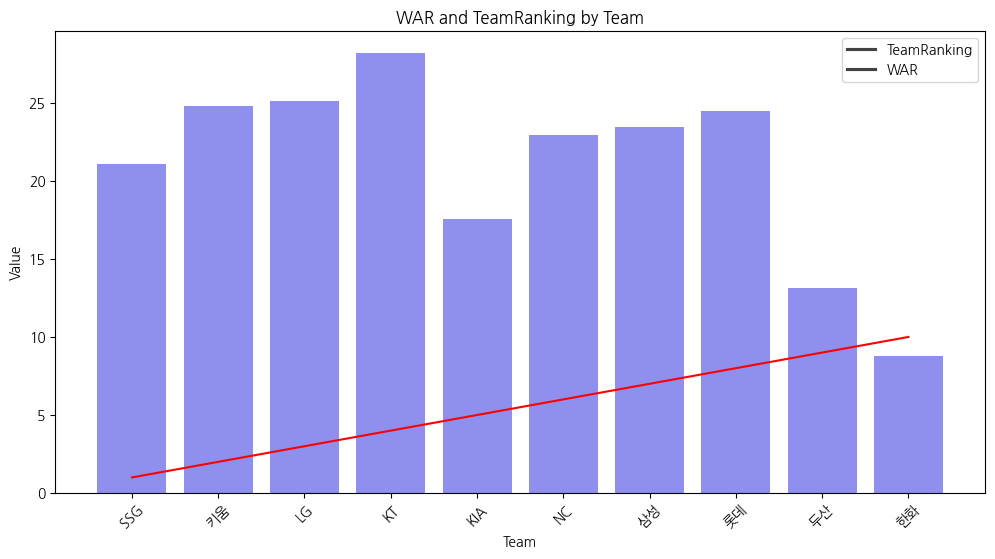

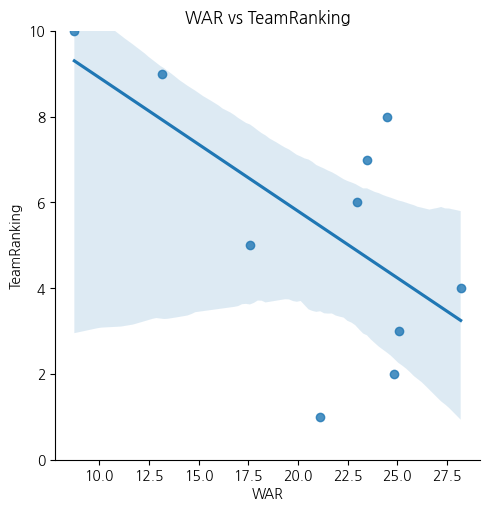

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 팀별 WAR을 막대 그래프로 시각화
sns.barplot(x='Team', y='WAR', data=team_2022_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

# 팀별 TeamRanking을 선 그래프로 시각화
sns.lineplot(x='Team', y='TeamRanking', data=team_2022_pitching, color='r')

# 제목과 축 라벨 설정
plt.title('WAR and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

# x축 레이블 회전
plt.xticks(rotation=45)

# 범례 설정
plt.legend(labels=['TeamRanking', 'WAR'])

# 그래프 출력
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# WAR와 TeamRanking 간의 산점도와 선형 회귀 선 그리기
sns.lmplot(x='WAR', y='TeamRanking', data=team_2022_pitching)
plt.title('WAR vs TeamRanking')
plt.xlabel('WAR')
plt.ylabel('TeamRanking')
plt.ylim(0, 10)
plt.show()


# ERA

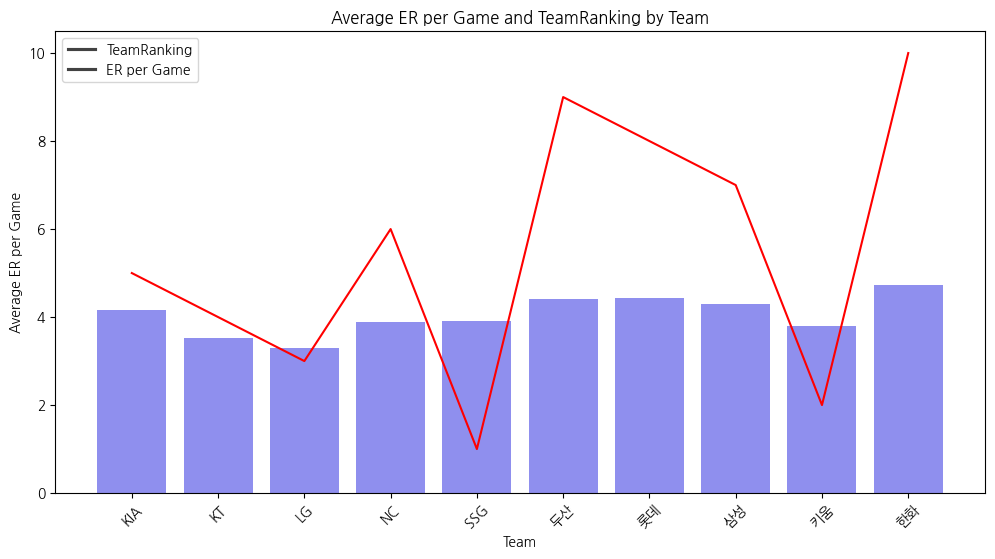

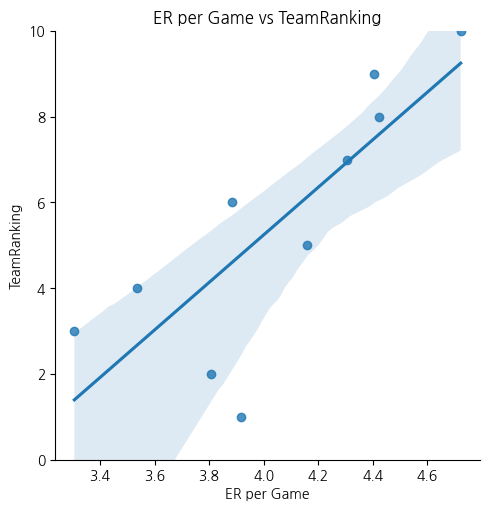

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# ER을 144로 나눈 후 평균 계산
team_2022_pitching['ER_per_game'] = team_2022_pitching['ER'] / 144
average_er_per_game_by_team = team_2022_pitching.groupby('Team')['ER_per_game'].mean().reset_index()

# TeamRanking을 오름차순으로 정렬
team_2021_pitching_sorted = team_2022_pitching.sort_values(by='TeamRanking')

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 팀별 ER을 막대 그래프로 시각화
sns.barplot(x='Team', y='ER_per_game', data=average_er_per_game_by_team, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

# 팀별 TeamRanking을 선 그래프로 시각화
sns.lineplot(x='Team', y='TeamRanking', data=team_2021_pitching_sorted, color='r')

# 제목과 축 라벨 설정
plt.title('Average ER per Game and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Average ER per Game')

# x축 레이블 회전
plt.xticks(rotation=45)

# 범례 설정
plt.legend(labels=['TeamRanking', 'ER per Game'])

# 그래프 출력
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# ER을 144로 나눈 값을 추가
team_2022_pitching['ER_per_game'] = team_2022_pitching['ER'] / 144

# ER_per_game과 TeamRanking 간의 상관 관계 시각화
sns.lmplot(x='ER_per_game', y='TeamRanking', data=team_2022_pitching)
plt.title('ER per Game vs TeamRanking')
plt.xlabel('ER per Game')
plt.ylabel('TeamRanking')
plt.ylim(0, 10)
plt.show()


# K/9

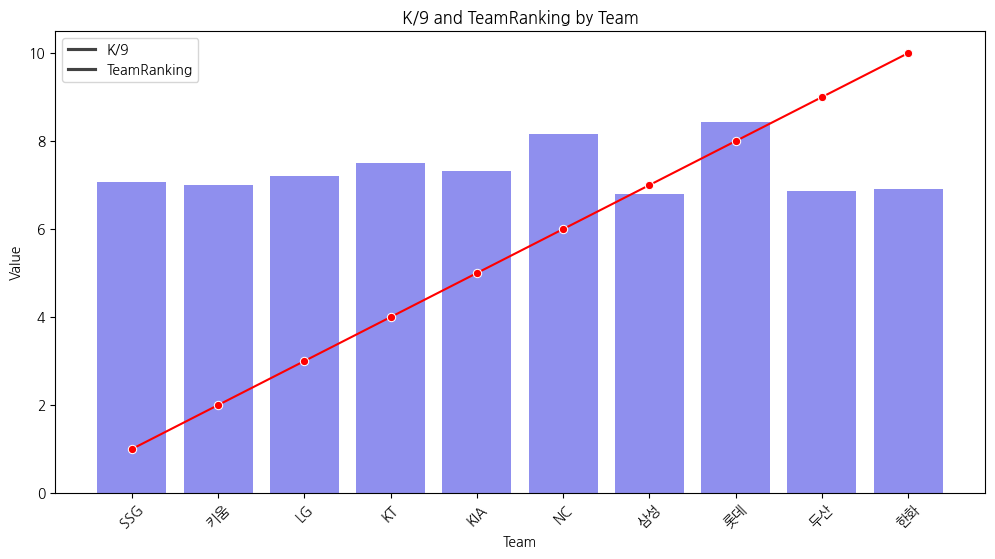

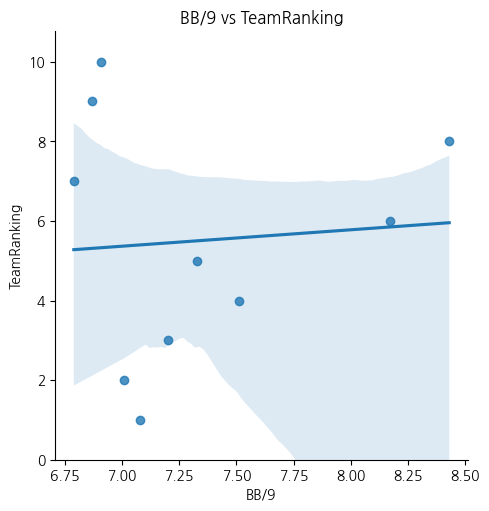

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 팀별 K/9을 막대 그래프로 시각화
sns.barplot(x='Team', y='K/9', data=team_2022_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

# TeamRanking을 선 그래프로 시각화
sns.lineplot(x='Team', y='TeamRanking', data=team_2022_pitching, color='r', marker='o')  # marker는 데이터 포인트를 표시하는 모양을 지정합니다.

# 제목과 축 라벨 설정
plt.title('K/9 and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

# x축 레이블 회전
plt.xticks(rotation=45)

# 범례 설정
plt.legend(labels=['K/9', 'TeamRanking'])

# 그래프 출력
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='K/9', y='TeamRanking', data=team_2022_pitching)
plt.title('BB/9 vs TeamRanking')
plt.xlabel('BB/9')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()


# BB/9

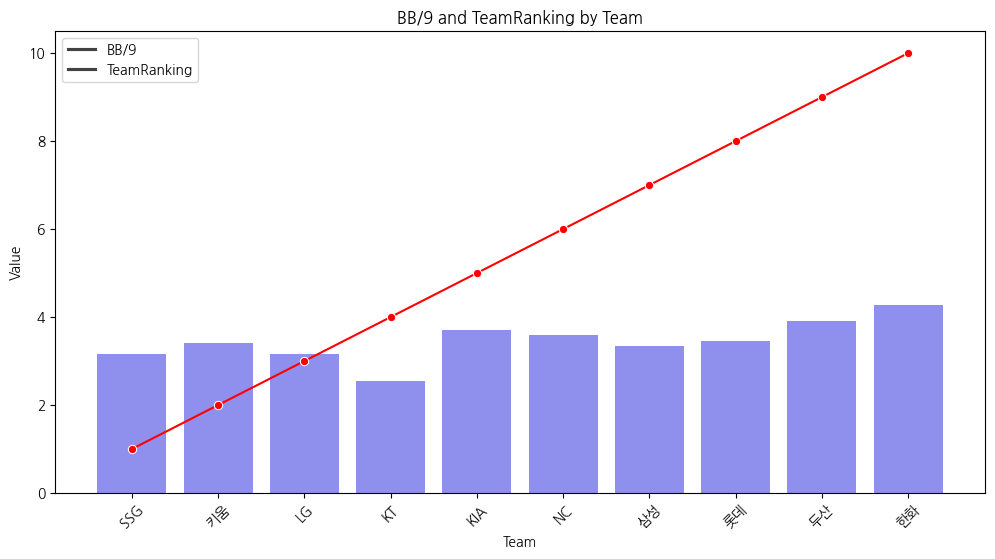

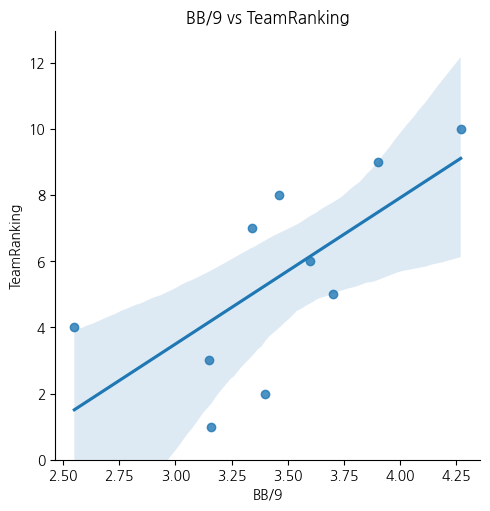

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='BB/9', data=team_2022_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

sns.lineplot(x='Team', y='TeamRanking', data=team_2022_pitching, color='r', marker='o')  # marker는 데이터 포인트를 표시하는 모양을 지정합니다.

plt.title('BB/9 and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['BB/9', 'TeamRanking'])

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='BB/9', y='TeamRanking', data=team_2022_pitching)
plt.title('BB/9 vs TeamRanking')
plt.xlabel('BB/9')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()


# K/BB

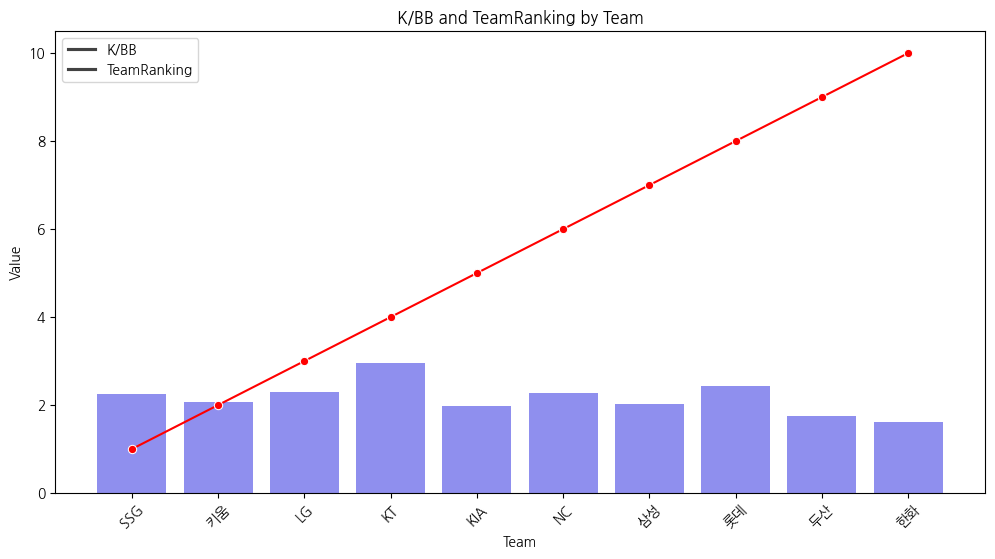

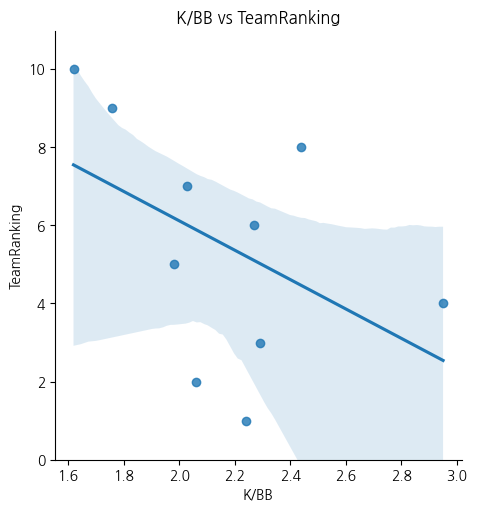

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='K/BB', data=team_2022_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

sns.lineplot(x='Team', y='TeamRanking', data=team_2022_pitching, color='r', marker='o')  # marker는 데이터 포인트를 표시하는 모양을 지정합니다.

plt.title('K/BB and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['K/BB', 'TeamRanking'])

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='K/BB', y='TeamRanking', data=team_2022_pitching)
plt.title('K/BB vs TeamRanking')
plt.xlabel('K/BB')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()


# BABIP

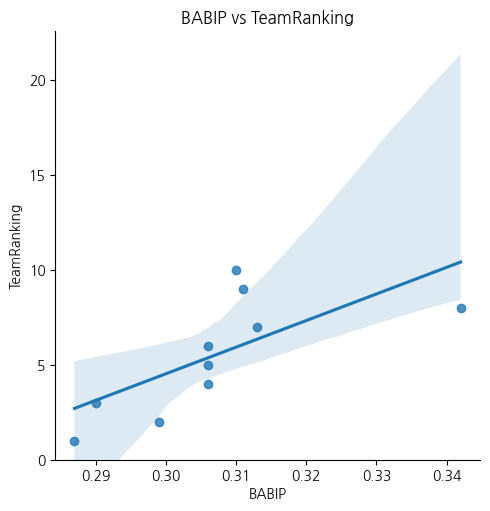

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='BABIP', y='TeamRanking', data=team_2022_pitching)
plt.title('BABIP vs TeamRanking')
plt.xlabel('BABIP')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()

# LOB

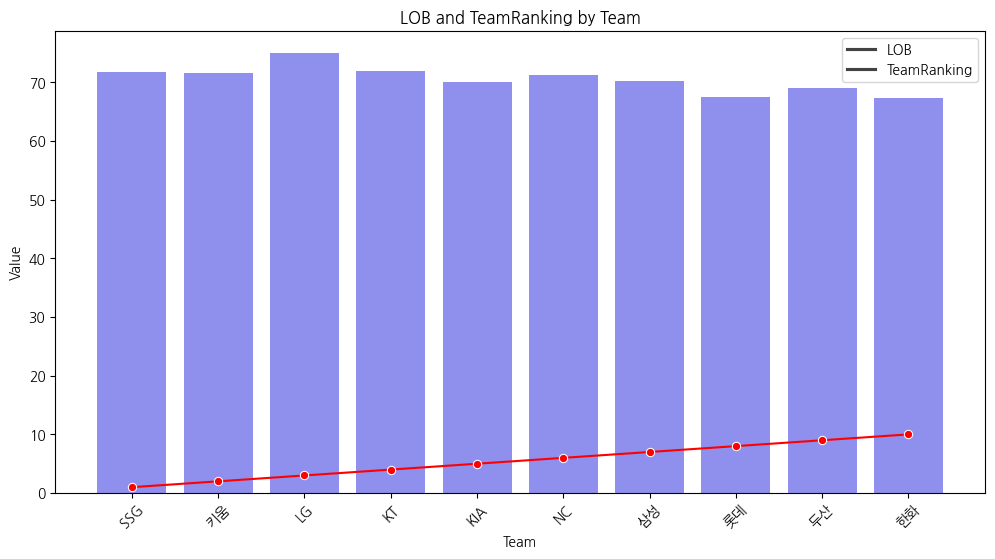

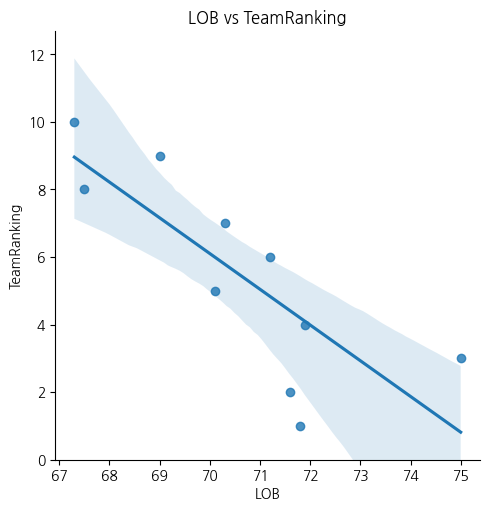

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='LOB', data=team_2022_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

sns.lineplot(x='Team', y='TeamRanking', data=team_2022_pitching, color='r', marker='o')  # marker는 데이터 포인트를 표시하는 모양을 지정합니다.

plt.title('LOB and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['LOB', 'TeamRanking'])

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='LOB', y='TeamRanking', data=team_2022_pitching)
plt.title('LOB vs TeamRanking')
plt.xlabel('LOB')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()

# AVG

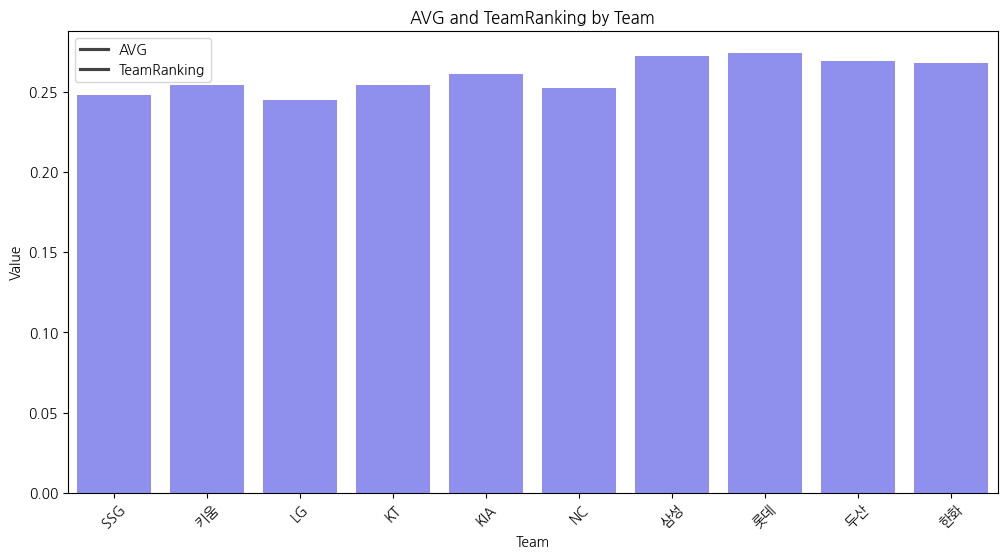

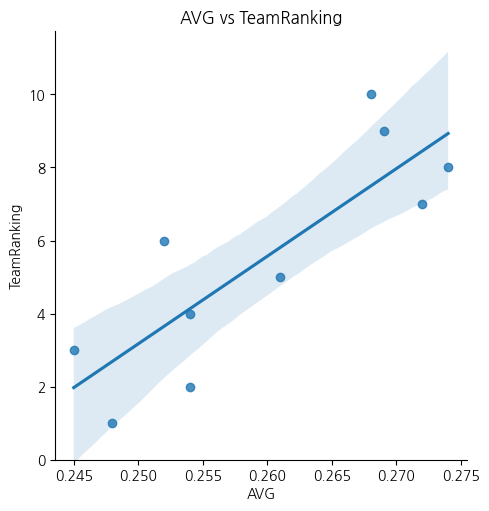

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='AVG', data=team_2022_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

plt.title('AVG and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['AVG', 'TeamRanking'])

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='AVG', y='TeamRanking', data=team_2022_pitching)
plt.title('AVG vs TeamRanking')
plt.xlabel('AVG')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()

# OBP

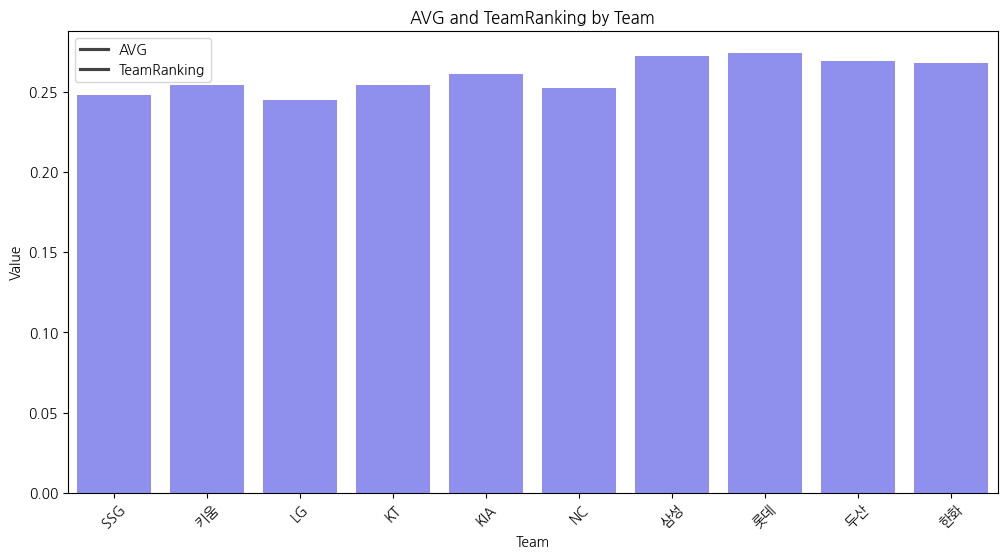

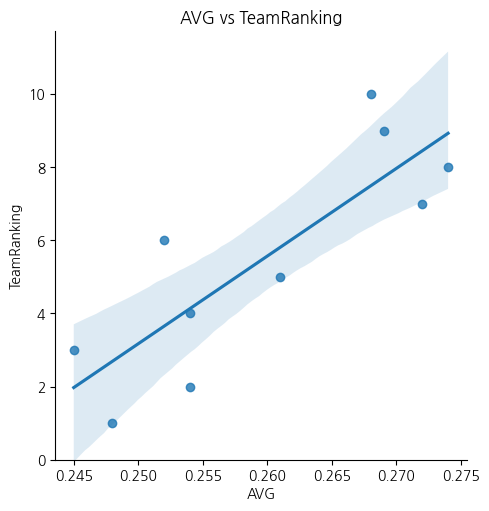

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='AVG', data=team_2022_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

plt.title('AVG and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['AVG', 'TeamRanking'])

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='AVG', y='TeamRanking', data=team_2022_pitching)
plt.title('AVG vs TeamRanking')
plt.xlabel('AVG')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()

# SLG

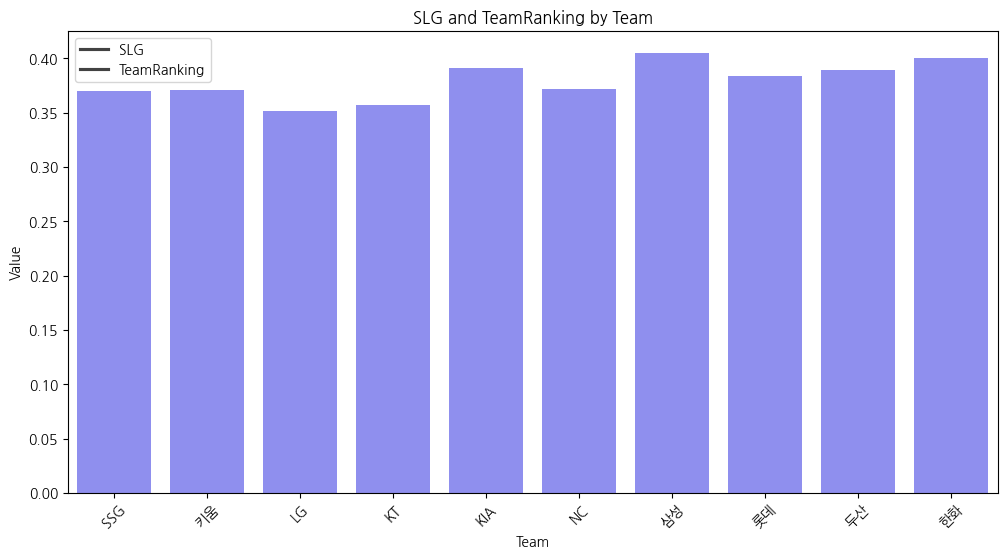

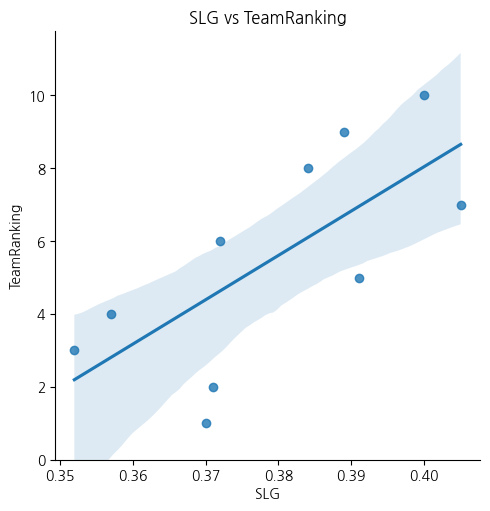

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='SLG', data=team_2022_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

plt.title('SLG and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['SLG', 'TeamRanking'])

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='SLG', y='TeamRanking', data=team_2022_pitching)
plt.title('SLG vs TeamRanking')
plt.xlabel('SLG')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()

# OPS

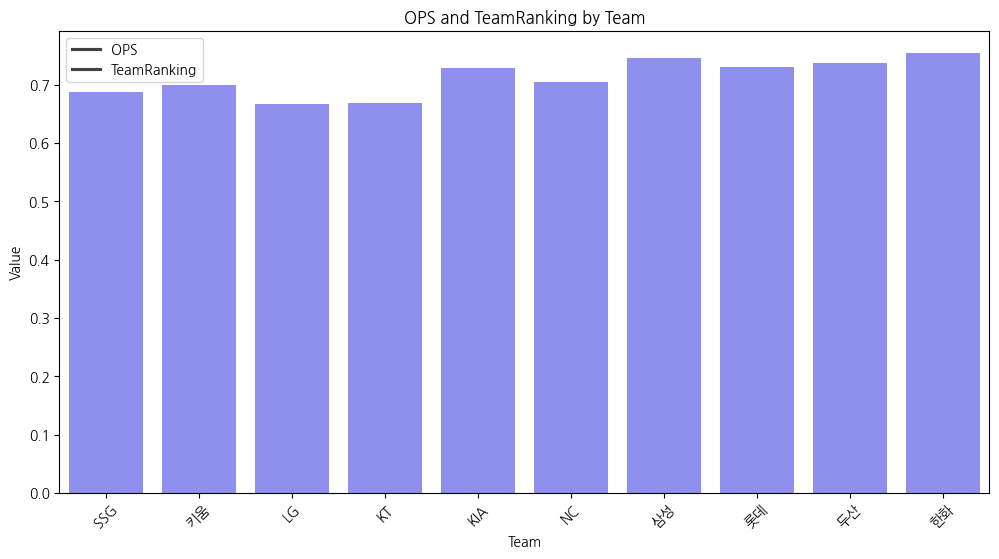

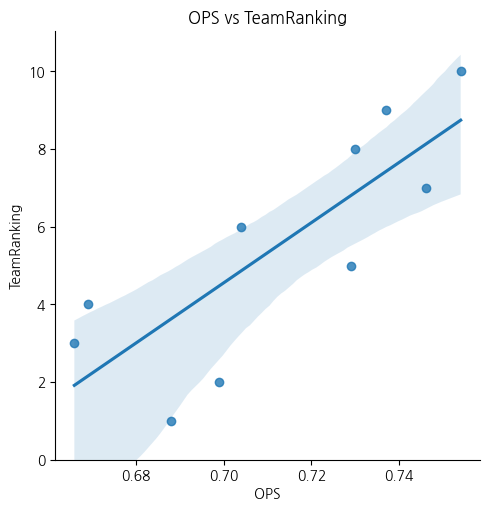

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='OPS', data=team_2022_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

plt.title('OPS and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['OPS', 'TeamRanking'])

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='OPS', y='TeamRanking', data=team_2022_pitching)
plt.title('OPS vs TeamRanking')
plt.xlabel('OPS')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()

# 투구 관련

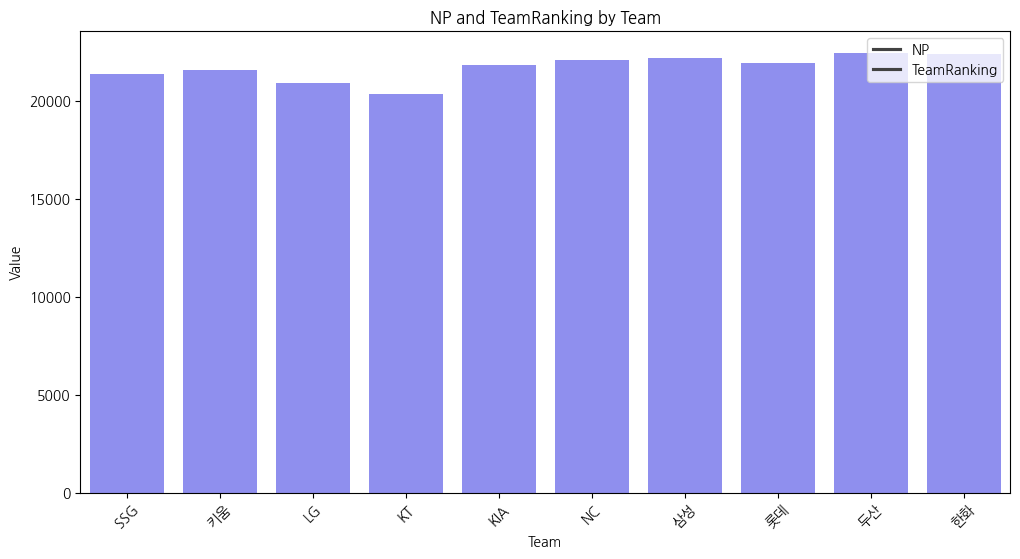

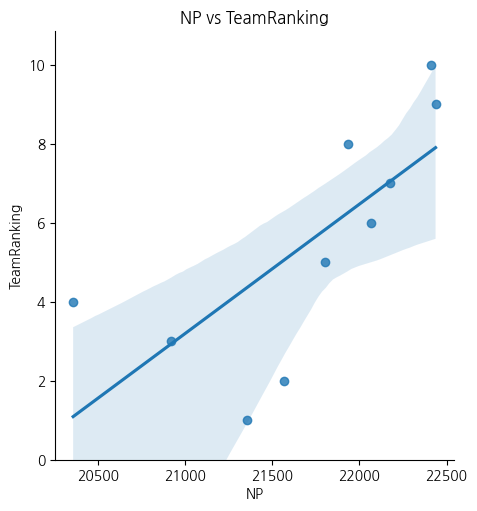

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='NP', data=team_2022_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

plt.title('NP and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['NP', 'TeamRanking'])

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='NP', y='TeamRanking', data=team_2022_pitching)
plt.title('NP vs TeamRanking')
plt.xlabel('NP')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()

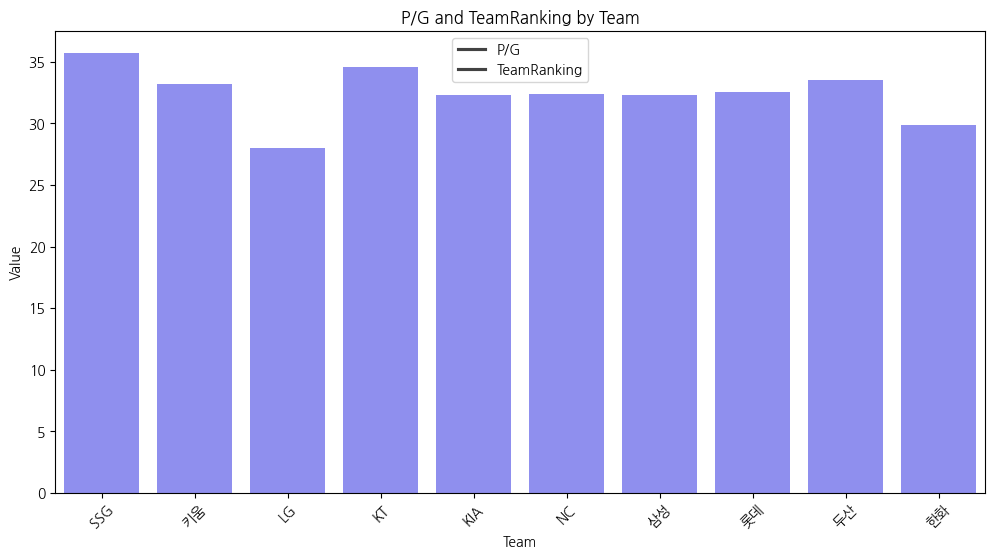

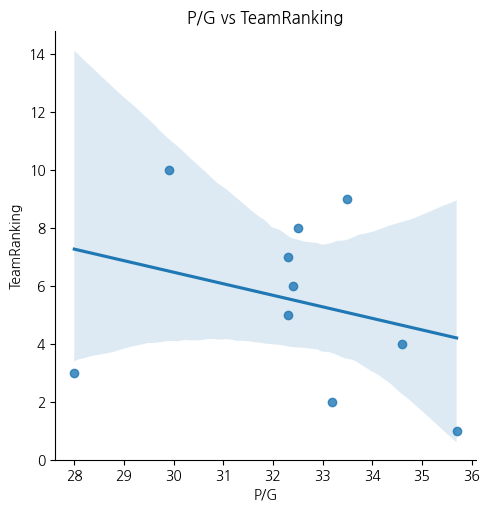

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='P/G', data=team_2022_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

plt.title('P/G and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['P/G', 'TeamRanking'])

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='P/G', y='TeamRanking', data=team_2022_pitching)
plt.title('P/G vs TeamRanking')
plt.xlabel('P/G')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()

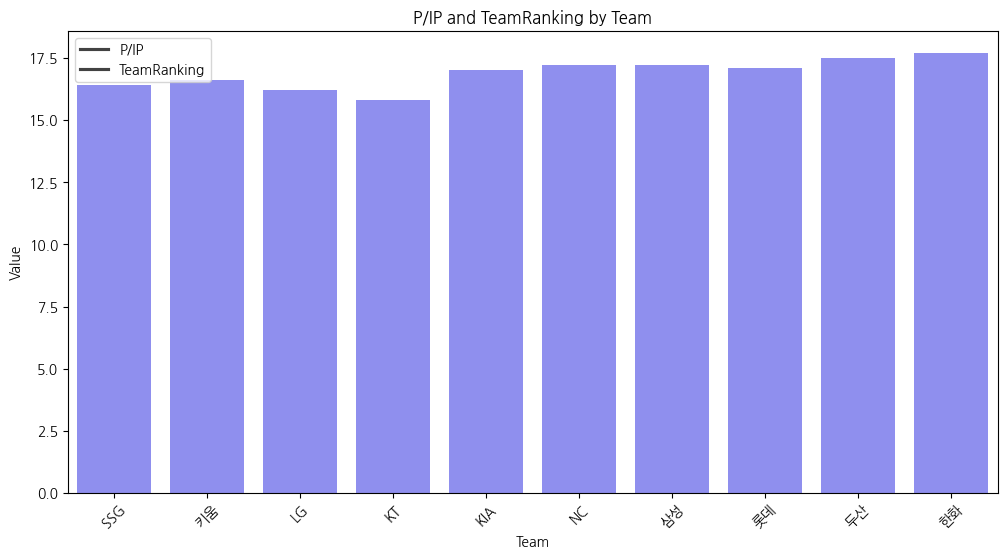

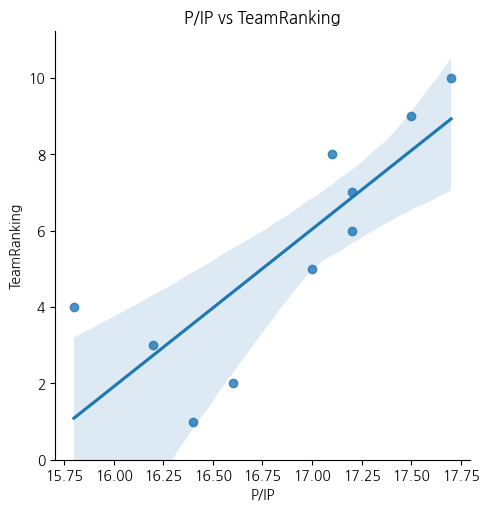

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='P/IP', data=team_2022_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

plt.title('P/IP and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['P/IP', 'TeamRanking'])

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='P/IP', y='TeamRanking', data=team_2022_pitching)
plt.title('P/IP vs TeamRanking')
plt.xlabel('P/IP')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()

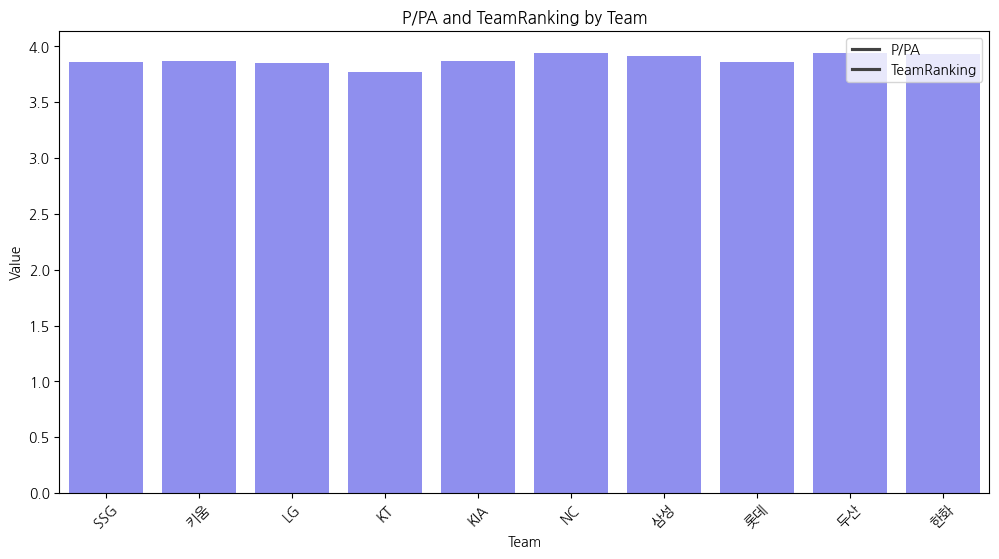

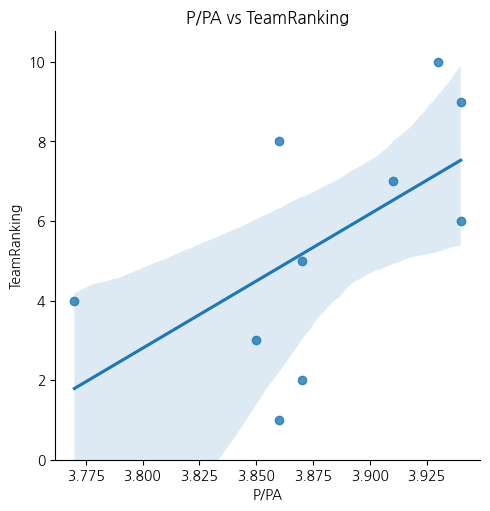

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='P/PA', data=team_2022_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

plt.title('P/PA and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['P/PA', 'TeamRanking'])

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='P/PA', y='TeamRanking', data=team_2022_pitching)
plt.title('P/PA vs TeamRanking')
plt.xlabel('P/PA')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()